In [18]:
import games
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing.pool import Pool

# np.random.seed(50)

population = 100
num_groups = 20
num_generations = 150
num_simulations = 100
cost_benefit_ratio = 0.3
cooperation_threshold = int(1)
group_split_method = 'empty'
group_split_probabilistic = True

group_split_sizes = [5, 10, 20, 50, 100]

sd_args = [[population, num_groups, num_generations, cost_benefit_ratio, cooperation_threshold, gss, 
         group_split_method, group_split_probabilistic, 'snowdrift'] for gss in group_split_sizes]
pd_args = [[population, num_groups, num_generations, cost_benefit_ratio, cooperation_threshold, gss, 
         group_split_method, group_split_probabilistic, 'prisoners dilemma'] for gss in group_split_sizes]
args = sd_args + pd_args

with Pool() as pool:
    all_results = pool.starmap(games.group_split_game_many, [[num_simulations] + arg for arg in args])


In [19]:

population_per_gen = [[variant[j][3] for j in range(num_simulations)] for variant in all_results]
mean_population_per_gen = np.mean(population_per_gen, axis=1)
std_population_per_gen = np.std(population_per_gen, axis=1)

cooperation_per_gen = [[variant[j][4] for j in range(num_simulations)] for variant in all_results]
mean_cooperation_per_gen = np.mean(cooperation_per_gen, axis=1)
std_cooperation_per_gen = np.std(cooperation_per_gen, axis=1)

total_reward_per_gen = [[variant[j][5] for j in range(num_simulations)] for variant in all_results]
mean_total_reward_per_gen = np.mean(total_reward_per_gen, axis=1)
std_total_reward_per_gen = np.std(total_reward_per_gen, axis=1)


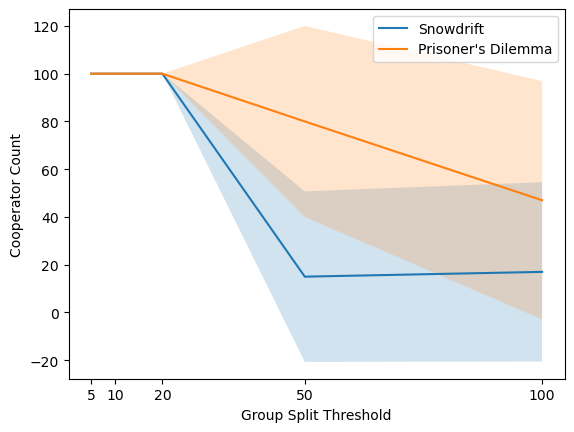

In [3]:

sd_mean_cooperation_final = np.array([simulation[-1] for simulation in mean_cooperation_per_gen[:len(group_split_sizes)]])
sd_std_cooperation_final = np.array([simulation[-1] for simulation in std_cooperation_per_gen[:len(group_split_sizes)]])
pd_mean_cooperation_final = np.array([simulation[-1] for simulation in mean_cooperation_per_gen[len(group_split_sizes):]])
pd_std_cooperation_final = np.array([simulation[-1] for simulation in std_cooperation_per_gen[len(group_split_sizes):]])

plt.plot(group_split_sizes, sd_mean_cooperation_final, label="Snowdrift")
plt.fill_between(group_split_sizes, sd_mean_cooperation_final - sd_std_cooperation_final, 
                 sd_mean_cooperation_final + sd_std_cooperation_final, alpha=0.2)

plt.plot(group_split_sizes, pd_mean_cooperation_final, label="Prisoner's Dilemma")
plt.fill_between(group_split_sizes, pd_mean_cooperation_final - pd_std_cooperation_final, 
                 pd_mean_cooperation_final + pd_std_cooperation_final, alpha=0.2)
plt.xticks(group_split_sizes)
plt.ylabel('Cooperator Count')
plt.xlabel('Group Split Threshold')
plt.legend()
# plt.grid()

plt.savefig("..\\figures\\var_split_threshold_prob_sd_pd.png", bbox_inches='tight', transparent=True)
plt.show()


In [ ]:
import seaborn as sns

sd_mean_cooperation_final = np.array([simulation[-1] for simulation in mean_cooperation_per_gen[:len(group_split_sizes)]])
sd_std_cooperation_final = np.array([simulation[-1] for simulation in std_cooperation_per_gen[:len(group_split_sizes)]])
pd_mean_cooperation_final = np.array([simulation[-1] for simulation in mean_cooperation_per_gen[len(group_split_sizes):]])
pd_std_cooperation_final = np.array([simulation[-1] for simulation in std_cooperation_per_gen[len(group_split_sizes):]])

# plt.plot(group_split_sizes, sd_mean_cooperation_final, label="Snowdrift")
# plt.fill_between(group_split_sizes, sd_mean_cooperation_final - sd_std_cooperation_final, 
#                  sd_mean_cooperation_final + sd_std_cooperation_final, alpha=0.2)

# plt.plot(group_split_sizes, pd_mean_cooperation_final, label="Prisoner's Dilemma")
# plt.fill_between(group_split_sizes, pd_mean_cooperation_final - pd_std_cooperation_final, 
#                  pd_mean_cooperation_final + pd_std_cooperation_final, alpha=0.2)
# plt.xticks(group_split_sizes)
# plt.ylabel('Cooperator Count')
# plt.xlabel('Group Split Threshold')
# plt.legend()

# plt.savefig("..\\figures\\var_split_threshold_prob_sd_pd.png", bbox_inches='tight', transparent=True)
# plt.show()

sns.violinplot(x=group_split_sizes, y=sd_mean_cooperation_final)


# Snowdrift

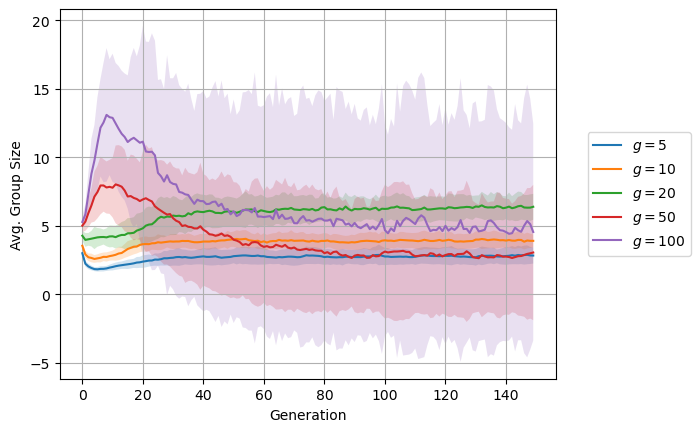

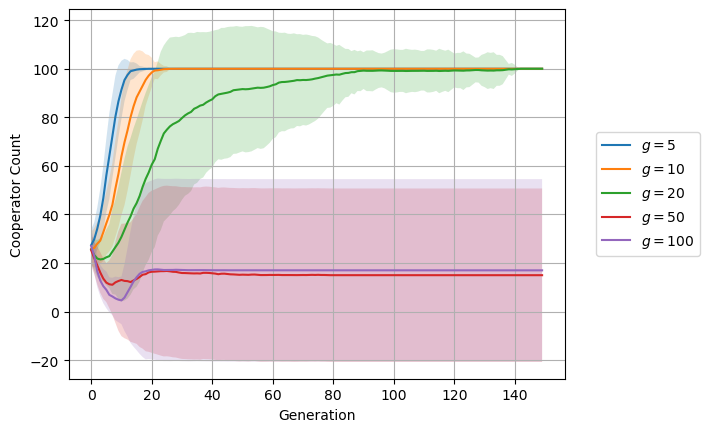

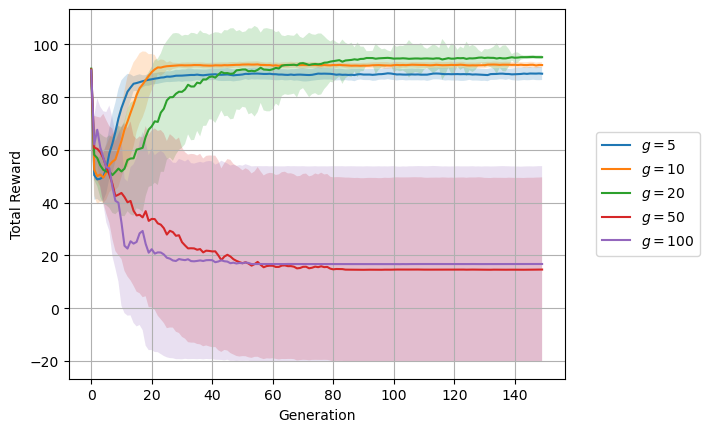

In [4]:

# plt.title(f'Group Split w/ Snowdrift Game\nVarying Cost/Benefit Ratio')
for i in range(len(group_split_sizes)):
    plt.plot(mean_population_per_gen[i], label=f'$g={group_split_sizes[i]}$')
    plt.fill_between(np.arange(num_generations), mean_population_per_gen[i] - std_population_per_gen[i], 
                     mean_population_per_gen[i] + std_population_per_gen[i], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.ylabel('Avg. Group Size')
plt.xlabel('Generation')
plt.grid()
plt.savefig("..\\figures\\var_split_threshold_prob_y_avg_group_size_sd.png", bbox_inches='tight', transparent=True)
plt.show()

# plt.title(f'Group Split w/ Snowdrift Game\nVarying Cost/Benefit Ratio')
for i in range(len(group_split_sizes)):
    plt.plot(mean_cooperation_per_gen[i], label=f'$g={group_split_sizes[i]}$')
    plt.fill_between(np.arange(num_generations), mean_cooperation_per_gen[i] - std_cooperation_per_gen[i], 
                     mean_cooperation_per_gen[i] + std_cooperation_per_gen[i], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.ylabel('Cooperator Count')
plt.xlabel('Generation')
plt.grid()
plt.savefig("..\\figures\\var_split_threshold_prob_y_cooperation_sd.png", bbox_inches='tight', transparent=True)
plt.show()

# plt.title(f'Group Split w/ Snowdrift Game\nVarying Cost/Benefit Ratio')
for i in range(len(group_split_sizes)):
    plt.plot(mean_total_reward_per_gen[i], label=f'$g={group_split_sizes[i]}$')
    plt.fill_between(np.arange(num_generations), mean_total_reward_per_gen[i] - std_total_reward_per_gen[i], 
                     mean_total_reward_per_gen[i] + std_total_reward_per_gen[i], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.ylabel('Total Reward')
plt.xlabel('Generation')
plt.grid()
plt.savefig("..\\figures\\var_split_threshold_prob_y_total_reward_sd.png", bbox_inches='tight', transparent=True)
plt.show()


# Prisoner's Dilemma

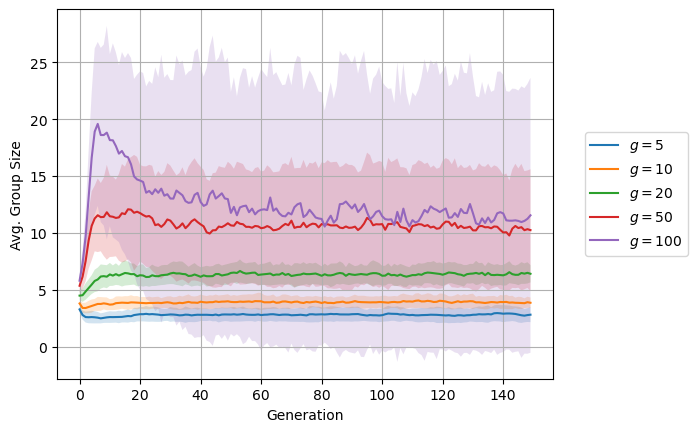

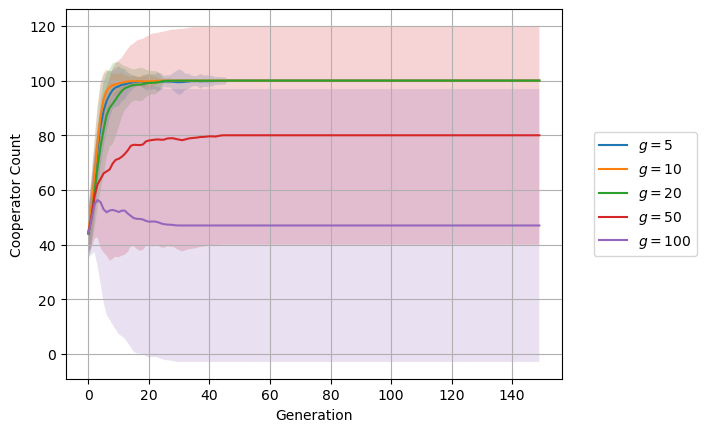

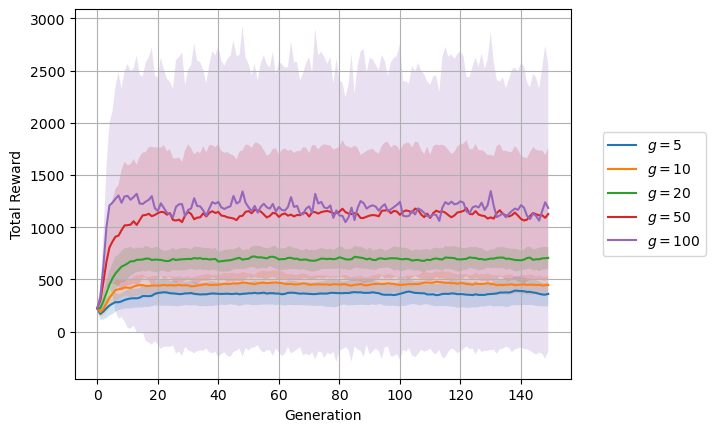

In [5]:

# plt.title(f'Group Split w/ Snowdrift Game\nVarying Cost/Benefit Ratio')
for j in range(len(group_split_sizes)):
    i = j + len(group_split_sizes)
    plt.plot(mean_population_per_gen[i], label=f'$g={group_split_sizes[j]}$')
    plt.fill_between(np.arange(num_generations), mean_population_per_gen[i] - std_population_per_gen[i], 
                     mean_population_per_gen[i] + std_population_per_gen[i], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.ylabel('Avg. Group Size')
plt.xlabel('Generation')
plt.grid()
plt.savefig("..\\figures\\var_split_threshold_prob_y_avg_group_size_pd.png", bbox_inches='tight', transparent=True)
plt.show()

# plt.title(f'Group Split w/ Snowdrift Game\nVarying Cost/Benefit Ratio')
for j in range(len(group_split_sizes)):
    i = j + len(group_split_sizes)
    plt.plot(mean_cooperation_per_gen[i], label=f'$g={group_split_sizes[j]}$')
    plt.fill_between(np.arange(num_generations), mean_cooperation_per_gen[i] - std_cooperation_per_gen[i], 
                     mean_cooperation_per_gen[i] + std_cooperation_per_gen[i], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.ylabel('Cooperator Count')
plt.xlabel('Generation')
plt.grid()
plt.savefig("..\\figures\\var_split_threshold_prob_y_cooperation_pd.png", bbox_inches='tight', transparent=True)
plt.show()

# plt.title(f'Group Split w/ Snowdrift Game\nVarying Cost/Benefit Ratio')
for j in range(len(group_split_sizes)):
    i = j + len(group_split_sizes)
    plt.plot(mean_total_reward_per_gen[i], label=f'$g={group_split_sizes[j]}$')
    plt.fill_between(np.arange(num_generations), mean_total_reward_per_gen[i] - std_total_reward_per_gen[i], 
                     mean_total_reward_per_gen[i] + std_total_reward_per_gen[i], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.ylabel('Total Reward')
plt.xlabel('Generation')
plt.grid()
plt.savefig("..\\figures\\var_split_threshold_prob_y_total_reward_pd.png", bbox_inches='tight', transparent=True)
plt.show()


# Snowdrift & Prisoner's Dilemma Condensed

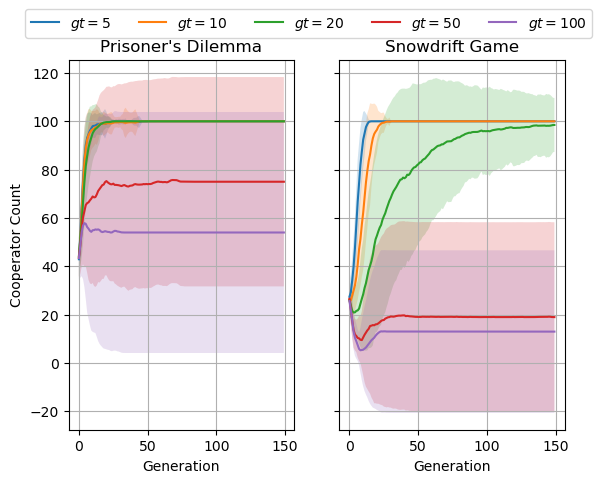

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(6.4, 4.8))

for i in range(len(group_split_sizes)):
    ax2.plot(mean_cooperation_per_gen[i], label=f'$gt={group_split_sizes[i]}$')
    ax2.fill_between(np.arange(num_generations), mean_cooperation_per_gen[i] - std_cooperation_per_gen[i], 
                     mean_cooperation_per_gen[i] + std_cooperation_per_gen[i], alpha=0.2)
ax2.set(title="Snowdrift Game", xlabel='Generation')
ax2.grid()

for j in range(len(group_split_sizes)):
    i = j + len(group_split_sizes)
    ax1.plot(mean_cooperation_per_gen[i], label='')
    ax1.fill_between(np.arange(num_generations), mean_cooperation_per_gen[i] - std_cooperation_per_gen[i], 
                     mean_cooperation_per_gen[i] + std_cooperation_per_gen[i], alpha=0.2)
ax1.set(title="Prisoner's Dilemma", xlabel='Generation', ylabel='Cooperator Count')
ax1.grid()

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=5)

plt.savefig("..\\figures\\var_split_threshold_prob_condensed.png", bbox_inches='tight', transparent=True)
plt.show()
